In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [25]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
df.shape

(7043, 21)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [28]:
df.groupby(['Contract']).MonthlyCharges.describe()

,count,mean,std,min,25%,50%,75%,max
Contract,,,,,,,,
Month-to-month,3875.0,66.398490,26.926599,18.75,45.850,73.25,88.875,117.45
One year,1473.0,65.048608,31.840539,18.25,26.900,68.75,94.800,118.60
Two year,1695.0,60.770413,34.678865,18.40,24.025,64.35,90.450,118.75


In [29]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [30]:
# check out the unique values here for each column.
for attr in df.columns.values.tolist()[1:]:
  print("Unique values in "+attr+":")
  print(np.unique(df[attr]).tolist())

Unique values in gender:
['Female', 'Male']
Unique values in SeniorCitizen:
[0, 1]
Unique values in Partner:
['No', 'Yes']
Unique values in Dependents:
['No', 'Yes']
Unique values in tenure:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
Unique values in PhoneService:
['No', 'Yes']
Unique values in MultipleLines:
['No', 'No phone service', 'Yes']
Unique values in InternetService:
['DSL', 'Fiber optic', 'No']
Unique values in OnlineSecurity:
['No', 'No internet service', 'Yes']
Unique values in OnlineBackup:
['No', 'No internet service', 'Yes']
Unique values in DeviceProtection:
['No', 'No internet service', 'Yes']
Unique values in TechSupport:
['No', 'No internet service', 'Yes']
Unique values in StreamingTV:
['No', 'No internet service', 'Yes']
Unique v

In [33]:
# Selecting the numerical fields for the analysis (droping 'customerID' feature)
del df["customerID"]

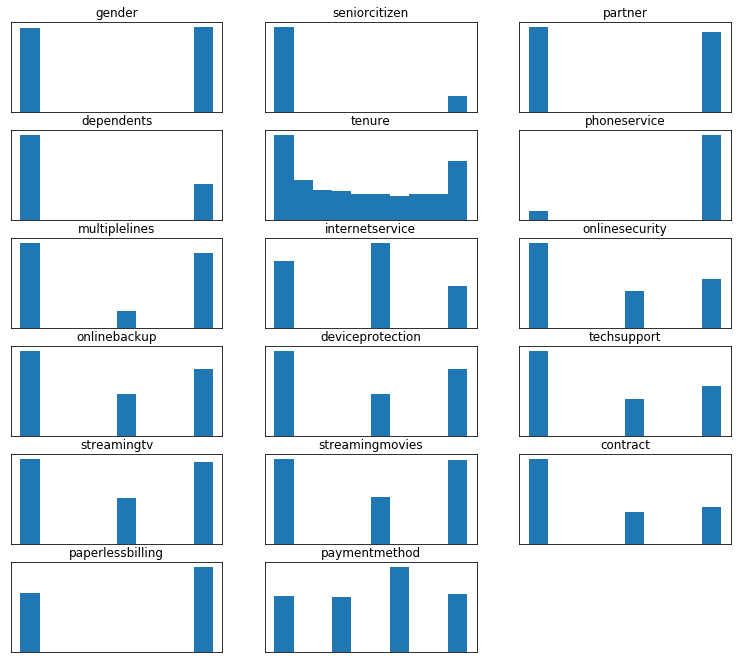

In [34]:
%matplotlib inline
columns = df.columns.values.tolist()[:]
i=1
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=2,right=3,top=1)
for attr in columns[:-1]:
  if attr in ('MonthlyCharges','TotalCharges'):
    continue  
  plt.subplot(6,3,i)
  plt.hist(df[attr].values,bins=10)
  plt.grid(False)
  plt.title(attr.lower())
  plt.xticks([])
  plt.yticks([])
  i+=1